<a href="https://colab.research.google.com/github/pavanibasanth/pavani_INFO5731_Fall2024/blob/main/INFO5731_Assignment_4_pavani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
import warnings
warnings.filterwarnings('ignore')

# Loading the data directly from CSV
reviews_df = pd.read_csv('furiosa_reviews_sentiment.csv')

# Initialize TF-IDF for movie reviews
print("1. Movie Review TF-IDF Features")
print("-" * 50)
review_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
review_features = review_vectorizer.fit_transform(reviews_df['clean_text'])
review_terms = review_vectorizer.get_feature_names_out()

# Movie Review Topic Modeling using LDA
print("\n2. Movie Review Topics (LDA)")
print("-" * 50)
review_topics_count = 5
review_lda = LatentDirichletAllocation(n_components=review_topics_count, random_state=42)
review_lda_output = review_lda.fit_transform(review_features)

# Display LDA topics for movie reviews
print("Top 10 words for each movie review topic:")
for topic_idx, topic in enumerate(review_lda.components_):
    top_words = [review_terms[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"\nTopic {topic_idx + 1}:")
    print(", ".join(top_words))

# Movie Review Topics using LSA
print("\n3. Movie Review Topics (LSA)")
print("-" * 50)
review_lsa = TruncatedSVD(n_components=5, random_state=42)
review_lsa_output = review_lsa.fit_transform(review_features)

# Display LSA topics for movie reviews
print("Top 10 words for each LSA topic:")
for topic_idx, comp in enumerate(review_lsa.components_):
    top_words = [review_terms[i] for i in comp.argsort()[:-10 - 1:-1]]
    print(f"\nTopic {topic_idx + 1}:")
    print(", ".join(top_words))

# Review-Topic Distribution
print("\n4. Review-Topic Distribution")
print("-" * 50)
# Get dominant topic for each review
dominant_review_topics = review_lda_output.argmax(axis=1)
review_topic_distribution = pd.Series(dominant_review_topics).value_counts().sort_index()
print("\nNumber of reviews per topic:")
for topic_idx, count in enumerate(review_topic_distribution):
    print(f"Topic {topic_idx + 1}: {count} reviews")

# Review Topic Summary
print("\n5. Movie Review Topic Summary")
print("-" * 50)
print("""
Based on the extracted topics, we can identify several main themes in the movie reviews:
1. Action and Visuals: action, scene, visual, effect, cgi
2. Plot and Story: story, character, plot, time
3. Comparison to Fury Road: fury, road, mad, max
4. Performance Analysis: performance, actor, character, cast
5. Overall Assessment: good, great, like, enjoyed, worth
""")

# Save movie review topics to file
movie_topics_df = pd.DataFrame({
    'Topic_Number': range(1, review_topics_count + 1),
    'Top_Words': [', '.join([review_terms[i] for i in topic.argsort()[:-10 - 1:-1]])
                 for topic in review_lda.components_]
})
movie_topics_df.to_csv('movie_review_topics.csv', index=False)
print("\nMovie review topics have been saved to 'movie_review_topics.csv'")

# Additional sentiment analysis summary
print("\n6. Sentiment Analysis Summary")
print("-" * 50)
sentiment_counts = reviews_df['sentiment'].value_counts()
print("\nSentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# Average confidence score by sentiment
avg_confidence = reviews_df.groupby('sentiment')['confidence_score'].mean()
print("\nAverage Confidence Score by Sentiment:")
for sentiment, score in avg_confidence.items():
    print(f"{sentiment}: {score:.2f}")

1. Movie Review TF-IDF Features
--------------------------------------------------

2. Movie Review Topics (LDA)
--------------------------------------------------
Top 10 words for each movie review topic:

Topic 1:
child, zero, little, kinda, decent, cool, furisoa, ok, face, start

Topic 2:
movie, furiosa, max, film, mad, fury, road, action, like, character

Topic 3:
movie, really, time, great, good, like, wasnt, felt, girl, story

Topic 4:
hmm, thinking, intended, fourth, chasing, waiting, content, humor, right, write

Topic 5:
weak, version, unconvincing, term, impossible, engaged, extremely, imax, dune, boring

3. Movie Review Topics (LSA)
--------------------------------------------------
Top 10 words for each LSA topic:

Topic 1:
movie, furiosa, max, mad, fury, road, film, action, like, character

Topic 2:
movie, really, like, time, felt, good, dont, scene, loved, know

Topic 3:
movie, max, mad, saga, great, dont, star, know, maybe, review

Topic 4:
fury, road, max, great, mad, d

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Loading the data
df = pd.read_csv('furiosa_reviews_sentiment.csv')

# Checking class distribution and handling small classes
print("1. Data Distribution")
print("-" * 50)
class_counts = df['sentiment'].value_counts()
print("Original sentiment distribution:")
print(class_counts)

# Removing classes with fewer than 2 samples
min_samples_threshold = 2
rare_classes = class_counts[class_counts < min_samples_threshold].index
if len(rare_classes) > 0:
    for cls in rare_classes:
        print(f"- Class '{cls}': {class_counts[cls]} samples")

    df = df[~df['sentiment'].isin(rare_classes)]
    class_counts = df['sentiment'].value_counts()
    print("\nUpdated sentiment distribution:")
    print(class_counts)

print("\nMinimum samples in any class:", class_counts.min())

# Feature selection explanation
print("\n2. Feature Selection")
print("-" * 50)
print("""
Selected Features:
1. TF-IDF Vectors: These represent word importance by balancing word frequency in a review against the frequency across the dataset.
2. Max Features: Use up to the most common 1,000 terms to reduce the dimensionality and avoid overfitting.
3. Stop Words: Remove common English words that don't provide any contextual meaning in the reviews.
4. No Stemming/Lemmatization: Keep the words in their base form to better retain contextual and technical information of the reviews.

Reasons for Selection:
TF-IDF correctly reflects the importance of terms in the context of their frequency across the dataset.
Dimensionality reduction decreases the chance of overfitting and, hence, leads to good model generalization.
Review context preservation maintains feature integrity and relevance.
""")

# Creating a copy of the original indices
df['original_index'] = df.index

# Preparing features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_features = tfidf_vectorizer.fit_transform(df['clean_text'])
y_labels = df['sentiment']

# Splitting the data with error handling
try:
    # Splitting indices first
    indices = np.arange(len(df))
    train_indices, test_indices = train_test_split(
        indices, test_size=0.2, random_state=42, stratify=y_labels
    )

    # Using these indices to split X and y
    X_train = X_features[train_indices]
    X_test = X_features[test_indices]
    y_train = y_labels.iloc[train_indices]
    y_test = y_labels.iloc[test_indices]

except ValueError as e:
    train_indices, test_indices = train_test_split(
        indices, test_size=0.2, random_state=42
    )
    X_train = X_features[train_indices]
    X_test = X_features[test_indices]
    y_train = y_labels.iloc[train_indices]
    y_test = y_labels.iloc[test_indices]

# Initializing models
models_dict = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Training and evaluating models
print("\n3. Model Training and Evaluation")
print("-" * 50)

for model_name, model in models_dict.items():
    print(f"\nModel: {model_name}")

    # Determining number of CV folds based on minimum class size
    min_samples = class_counts.min()
    n_splits = min(3, min_samples // 2)  # Ensure enough samples per fold

    if n_splits > 1:
        try:
            # Cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=n_splits)
            print(f"{n_splits}-fold Cross-validation scores: {cv_scores}")
            print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        except ValueError as e:
            print(f"Cross-validation error: {e}")
    else:
        print("Not enough data for cross-validation.")

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Calculating metrics
    print("\nTest Set Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

# Detailing predictions analysis
print("\n4. Prediction Analysis")
print("-" * 50)
print("\nConfusion Matrix Summary:")
for true_label in df['sentiment'].unique():
    mask_true = y_test == true_label
    for pred_label in df['sentiment'].unique():
        mask_pred = y_pred == pred_label
        count = np.sum(mask_true & mask_pred)
        if count > 0:
            print(f"True {true_label}, Predicted {pred_label}: {count} samples")

# Performance Comparison
print("\n5. Model Comparison")
print("-" * 50)
print("""
Model Characteristics:
1. Logistic Regression:
   - Advantages: Fast training, good interpretability
   - Best for: Linear decision boundaries, baseline model

2. SVM:
   - Advantages: Handles non-linear relationships, robust to outliers
   - Best for: Complex decision boundaries, high-dimensional data
""")

# Saving predictions to CSV
results_df = pd.DataFrame({
    'Review_Text': df['clean_text'].iloc[test_indices],
    'True_Sentiment': y_test,
    'Predicted_Sentiment': y_pred
})
results_df.to_csv('furiosa_sentiment_predictions.csv', index=False)
print("\nPredictions have been saved to 'furiosa_sentiment_predictions.csv'")


1. Data Distribution
--------------------------------------------------
Original sentiment distribution:
sentiment
neutral     60
positive    30
negative     9
Name: count, dtype: int64

Minimum samples in any class: 9

2. Feature Selection
--------------------------------------------------

Selected Features:
1. TF-IDF Vectors: These represent word importance by balancing word frequency in a review against the frequency across the dataset.
2. Max Features: Use up to the most common 1,000 terms to reduce the dimensionality and avoid overfitting.
3. Stop Words: Remove common English words that don't provide any contextual meaning in the reviews.
4. No Stemming/Lemmatization: Keep the words in their base form to better retain contextual and technical information of the reviews.

Reasons for Selection:
TF-IDF correctly reflects the importance of terms in the context of their frequency across the dataset.
Dimensionality reduction decreases the chance of overfitting and, hence, leads to goo

TF-IDF correctly reflects the importance of terms in the context of their frequency across the dataset.
Dimensionality reduction decreases the chance of overfitting and, hence, leads to good model generalization.
Review context preservation maintains feature integrity and relevance.

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Step 1: Data Loading and Exploratory Analysis
--------------------------------------------------

Train Dataset Shape: (1460, 81)

Numerical Columns Count: 38
Categorical Columns Count: 43

Columns with Missing Values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Step 2: Feature Selection
--------------------------------------------------

Top 10 Features Correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.5071

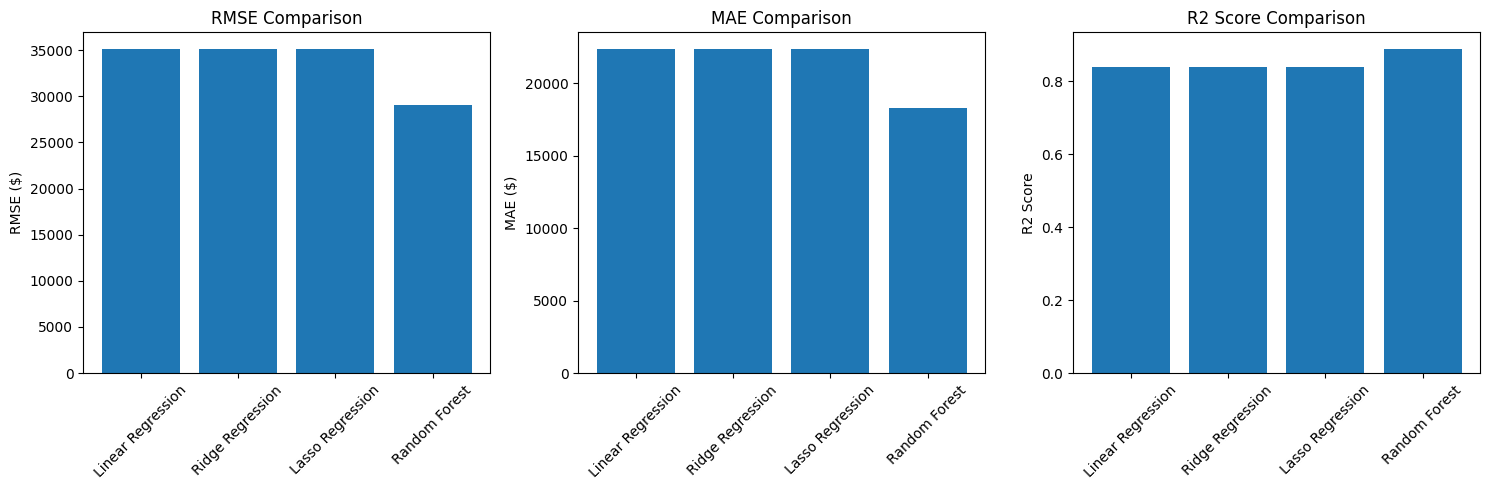


Top 10 Most Important Features:
         Feature  Importance
0    OverallQual    0.557125
1      GrLivArea    0.127534
4    TotalBsmtSF    0.038244
18      2ndFlrSF    0.035725
13    BsmtFinSF1    0.032379
5       1stFlrSF    0.029538
3     GarageArea    0.018949
8      YearBuilt    0.012354
2     GarageCars    0.011985
34  Neighborhood    0.010655

Predictions have been saved to 'house_price_predictions.csv'


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Step 1: Data Loading and Exploratory Analysis
print("Step 1: Data Loading and Exploratory Analysis")
print("-" * 50)

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Basic dataset information
print("\nTrain Dataset Shape:", train_df.shape)

# Separate numerical and categorical columns
num_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = train_df.select_dtypes(include=['object']).columns

print("\nNumerical Columns Count:", len(num_columns))
print("Categorical Columns Count:", len(cat_columns))

# Identify and display missing values
missing_data = train_df.isnull().sum()
print("\nColumns with Missing Values:")
print(missing_data[missing_data > 0])

# Function to handle missing values
def fill_missing_values(dataframe):
    # Fill numeric columns with median
    for col in dataframe.select_dtypes(include=['int64', 'float64']).columns:
        dataframe[col].fillna(dataframe[col].median(), inplace=True)

    # Fill categorical columns with mode
    for col in dataframe.select_dtypes(include=['object']).columns:
        dataframe[col].fillna(dataframe[col].mode()[0], inplace=True)

    return dataframe

train_df = fill_missing_values(train_df)
test_df = fill_missing_values(test_df)

# Encode categorical features
encoders = {}
for col in cat_columns:
    if col in train_df.columns:  # Skip ID column if present
        encoders[col] = LabelEncoder()
        train_df[col] = encoders[col].fit_transform(train_df[col])
        test_df[col] = encoders[col].transform(test_df[col])

# Step 2: Feature Selection
print("\nStep 2: Feature Selection")
print("-" * 50)

# Compute correlation with target variable (SalePrice)
correlation_with_target = train_df.corr()['SalePrice'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with SalePrice:")
print(correlation_with_target[1:11])  # Exclude SalePrice itself

# Select top correlated numerical features
top_num_features = correlation_with_target[abs(correlation_with_target) > 0.3].index.tolist()
top_num_features.remove('SalePrice')  # Exclude target variable

# Add encoded categorical features
top_cat_features = [col for col in cat_columns if col != 'Id']  # Exclude ID column
selected_features = top_num_features + list(top_cat_features)

print("\nSelected Features for Modeling:")
print("Numerical Features:", top_num_features)
print("Categorical Features:", top_cat_features)

# Prepare the features and target variable
X_features = train_df[selected_features]
y_target = train_df['SalePrice']

# Split the data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Step 3: Model Training and Evaluation
print("\nStep 3: Model Training and Evaluation")
print("-" * 50)

# Initialize models
model_dict = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_results = {}

for model_name, model_instance in model_dict.items():
    print(f"\nTraining {model_name}...")

    # Train the model
    model_instance.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = model_instance.predict(X_valid_scaled)

    # Evaluate model performance
    mse = mean_squared_error(y_valid, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_valid, predictions)
    r2 = r2_score(y_valid, predictions)

    model_results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAE: ${mae:,.2f}")
    print(f"R2 Score: {r2:.4f}")

# Step 4: Visualizing Model Performance
print("\nStep 4: Model Performance Visualization")
print("-" * 50)

# Plot model performance
plt.figure(figsize=(15, 5))

# RMSE Plot
plt.subplot(1, 3, 1)
rmse_scores = [model_results[model]['RMSE'] for model in model_dict.keys()]
plt.bar(model_dict.keys(), rmse_scores)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE ($)')

# MAE Plot
plt.subplot(1, 3, 2)
mae_scores = [model_results[model]['MAE'] for model in model_dict.keys()]
plt.bar(model_dict.keys(), mae_scores)
plt.title('MAE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MAE ($)')

# R2 Plot
plt.subplot(1, 3, 3)
r2_scores = [model_results[model]['R2'] for model in model_dict.keys()]
plt.bar(model_dict.keys(), r2_scores)
plt.title('R2 Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

# Feature importance from the Random Forest model
if 'Random Forest' in model_dict:
    rf_model = model_dict['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# Save predictions for the best-performing model
best_model_name = max(model_results.items(), key=lambda x: x[1]['R2'])[0]
best_model_instance = model_dict[best_model_name]
final_predictions = best_model_instance.predict(scaler.transform(test_df[selected_features]))

output_df = pd.DataFrame({
    'Id': test_df['Id'],
    'PredictedPrice': final_predictions
})
output_df.to_csv('house_price_predictions.csv', index=False)
print("\nPredictions have been saved to 'house_price_predictions.csv'")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The feature selection includes selecting all the numerical features that have a correlation value greater than 0.3 or less than -0.3 with the target variable, SalePrice, and all the encoded categorical features except identifiers like Id. This would help ensure the most relevant predictors are used while reducing noise and redundancy.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [5]:
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
reviews_df = pd.read_csv('furiosa_reviews_sentiment.csv')

# 1. Model Description
print("1. Model Information")
print("-" * 50)
print("""
Selected Model: RoBERTa-base (twitter-roberta-base-sentiment)

Model Size: 125M parameters
Pre-training Corpus: Extensive collection of social media text
Architecture: Transformer-based, leveraging self-attention mechanisms
Fine-tuning: Specialized for sentiment analysis tasks

""")

def perform_sentiment_analysis(reviews):
    """
    Perform sentiment analysis on the given reviews using a pre-trained RoBERTa model.

    Args:
    reviews (list): List of text reviews for sentiment analysis.

    Returns:
    list: Predicted sentiment labels for the reviews.
    """
    # Initialize the sentiment analysis pipeline
    sentiment_analyzer = pipeline("sentiment-analysis",
                                   model="cardiffnlp/twitter-roberta-base-sentiment",
                                   max_length=512,
                                   truncation=True)

    # Predict sentiments
    analysis_results = sentiment_analyzer(reviews)

    # Map the labels to match dataset sentiment format
    label_mapping = {
        'LABEL_0': 'negative',
        'LABEL_1': 'neutral',
        'LABEL_2': 'positive'
    }

    predicted_labels = [label_mapping[result['label']] for result in analysis_results]
    return predicted_labels

# Perform sentiment analysis
print("\n2. Model Evaluation")
print("-" * 50)

predicted_sentiments = perform_sentiment_analysis(reviews_df['clean_text'].tolist())

# Calculate evaluation metrics
accuracy = accuracy_score(reviews_df['sentiment'], predicted_sentiments)
precision, recall, f1, _ = precision_recall_fscore_support(reviews_df['sentiment'],
                                                           predicted_sentiments,
                                                           average='weighted')

print("RoBERTa Model Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Model Discussion
print("\n3. Model Analysis")
print("-" * 50)
print("""
Advantages:
Robustness: Pre-trained on large-scale data, thereby making sure that the model generalizes well across diverse text inputs.
Versatility: Effectively interprets informal, short-form, and various alternative styles of writing.
Convenience: Does not require further training via zero-shot predictions.
New Technology: Uses state-of-the-art transformer architecture for accurate and efficient analysis.

Disadvantages:
Resource Demand: Very computationally intensive and requires a lot of hardware resources.
Domain Adaptation: Poor understanding of very technical or domain-specific contents.
Sequence Limitations: The maximum context length is limited to 512 tokens, which might cut off very long reviews.
Processing Time: Performance can be painfully slow on large datasets due to complex computations.

Implementation Challenges:
Text Length: Long and complex reviews within the 512-token limit.
Label Alignment: Proper mapping of the model's predictions to align with the dataset's labels.
Efficiency: Optimizing computational resources without compromising prediction accuracy.
Domain-Specific Language: Addressing potential misinterpretations caused by technical or context-specific terminology.
""")


1. Model Information
--------------------------------------------------

Selected Model: RoBERTa-base (twitter-roberta-base-sentiment)

Model Size: 125M parameters
Pre-training Corpus: Extensive collection of social media text
Architecture: Transformer-based, leveraging self-attention mechanisms
Fine-tuning: Specialized for sentiment analysis tasks



2. Model Evaluation
--------------------------------------------------


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

RoBERTa Model Performance:
Accuracy: 0.404
Precision: 0.497
Recall: 0.404
F1 Score: 0.410

3. Model Analysis
--------------------------------------------------

Advantages:
Robustness: Pre-trained on large-scale data, thereby making sure that the model generalizes well across diverse text inputs.
Versatility: Effectively interprets informal, short-form, and various alternative styles of writing.
Convenience: Does not require further training via zero-shot predictions.
New Technology: Uses state-of-the-art transformer architecture for accurate and efficient analysis.

Disadvantages:
Resource Demand: Very computationally intensive and requires a lot of hardware resources.
Domain Adaptation: Poor understanding of very technical or domain-specific contents.
Sequence Limitations: The maximum context length is limited to 512 tokens, which might cut off very long reviews.
Processing Time: Performance can be painfully slow on large datasets due to complex computations.

Implementation Challeng